In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
babs = pd.read_csv('data/201508_trip_data.csv.gz')

In [4]:
babs['Start Date'] = babs['Start Date'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y %H:%M'))

In [8]:
babs['hour'] = babs['Start Date'].apply(lambda x: x.hour)

In [9]:
babs['date'] = babs['Start Date'].apply(lambda x: x.date())

In [11]:
babs[['Start Date', 'hour', 'date']].head(20)

,Start Date,hour,date
0,2015-08-31 23:26:00,23,2015-08-31
1,2015-08-31 23:11:00,23,2015-08-31
2,2015-08-31 23:13:00,23,2015-08-31
3,2015-08-31 23:10:00,23,2015-08-31
4,2015-08-31 23:09:00,23,2015-08-31
5,2015-08-31 23:07:00,23,2015-08-31
6,2015-08-31 23:07:00,23,2015-08-31
7,2015-08-31 22:16:00,22,2015-08-31
8,2015-08-31 22:12:00,22,2015-08-31
9,2015-08-31 21:57:00,21,2015-08-31


In [12]:
test_df = pd.DataFrame({'label': [1,2,1,2], 'value': [1,2,3,4]})

In [13]:
test_df

,label,value
0,1,1
1,2,2
2,1,3
3,2,4


In [14]:
test_df.groupby('label').sum()

,value
label,
1,4
2,6


In [15]:
test_df.groupby('label').size()

label
1    2
2    2
dtype: int64

In [25]:
counts = babs.groupby(['date', 'hour']).size()

In [26]:
counts

date        hour
2014-09-01  0         3
            3         1
            4         2
            5         1
            6         1
            7         4
            8        13
            9        16
            10       30
            11       21
            12       55
            13       45
            14       49
            15       28
            16       23
            17       25
            18        7
            19       19
            20       12
            21        9
            22        4
2014-09-02  1         1
            4         2
            5         4
            6        31
            7       113
            8       181
            9       152
            10       53
            11       39
                   ... 
2015-08-30  17       19
            18       14
            19       14
            20       12
            21        4
            22        4
            23        2
2015-08-31  0         4
            1         1
            3         1

In [27]:
counts.name

In [28]:
counts.name = 'count'

In [33]:
X = (counts
     .reset_index()
     .pivot_table(columns='hour', index='date', values='count')
     .fillna(0))

In [34]:
X.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,
2014-09-01,3.0,0.0,0.0,1.0,2.0,1.0,1.0,4.0,13.0,16.0,...,49.0,28.0,23.0,25.0,7.0,19.0,12.0,9.0,4.0,0.0
2014-09-02,0.0,1.0,0.0,0.0,2.0,4.0,31.0,113.0,181.0,152.0,...,43.0,51.0,111.0,198.0,141.0,52.0,24.0,12.0,9.0,9.0
2014-09-03,0.0,1.0,1.0,1.0,1.0,9.0,34.0,124.0,218.0,139.0,...,46.0,47.0,107.0,209.0,151.0,69.0,22.0,17.0,13.0,7.0
2014-09-04,2.0,0.0,0.0,0.0,3.0,7.0,37.0,107.0,195.0,125.0,...,47.0,56.0,122.0,191.0,125.0,51.0,29.0,23.0,19.0,6.0
2014-09-05,2.0,2.0,0.0,2.0,2.0,7.0,25.0,104.0,190.0,123.0,...,41.0,52.0,119.0,164.0,110.0,37.0,29.0,9.0,13.0,9.0


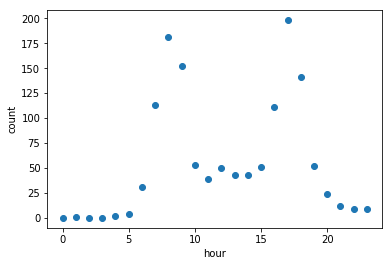

In [107]:
plt.plot(X.ix[1], 'o')
plt.ylabel('count')
plt.xlabel('hour')

In [56]:
ks = range(2,10)

In [57]:
from sklearn.cluster import KMeans

In [58]:
scores = [-KMeans(k).fit(X).score(X) for k in ks]

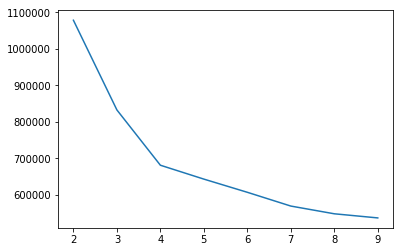

In [59]:
plt.plot(ks, scores)

In [60]:
model = KMeans(4).fit(X)

In [61]:
model.predict(X)

array([1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 2, 2, 1, 1, 0, 0,
       0, 2, 2, 1, 1, 0, 0, 0, 0, 2, 1, 1, 2, 2, 0, 2, 2, 1, 1, 2, 0, 0, 0,
       2, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 3, 1, 1, 0, 0, 0, 0, 2, 1,
       1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 3, 3, 2, 1, 1, 2, 2, 3, 1, 1, 1, 1, 2,
       3, 3, 2, 2, 1, 1, 0, 0, 2, 1, 3, 1, 1, 3, 3, 3, 2, 3, 1, 1, 3, 3, 1,
       1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 2, 2, 2,
       1, 1, 3, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 2, 3, 1, 1,
       0, 0, 0, 0, 2, 1, 1, 1, 0, 2, 2, 2, 1, 1, 0, 2, 2, 2, 2, 1, 1, 2, 0,
       0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0,
       2, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 2, 0, 0, 2, 1, 1, 0, 0, 0, 0, 2, 1,
       1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0,
       0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0,
       0, 2, 1, 1, 0, 0, 3, 0, 2, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 2,
       1, 1,

In [62]:
model.cluster_centers_

array([[   2.25      ,    0.92763158,    0.39473684,    0.40789474,
           2.69736842,    7.49342105,   33.82236842,  104.77631579,
         209.61184211,  140.68421053,   51.65789474,   42.53947368,
          49.56578947,   43.71052632,   35.5       ,   51.55263158,
         118.84868421,  188.90789474,  129.35526316,   60.51315789,
          31.28289474,   20.65789474,   11.80921053,    6.36184211],
       [   3.67521368,    2.34188034,    1.27350427,    0.53846154,
           0.47008547,    0.99145299,    2.30769231,    6.2991453 ,
          13.00854701,   19.05128205,   25.38461538,   30.71794872,
          33.90598291,   33.85470085,   32.12820513,   31.72649573,
          30.01709402,   24.54700855,   19.13675214,   13.96581197,
          10.86324786,    8.51282051,    6.44444444,    4.62393162],
       [   2.66666667,    1.05128205,    0.66666667,    0.34615385,
           1.94871795,    6.55128205,   28.83333333,   90.24358974,
         181.61538462,  128.07692308,   50.987

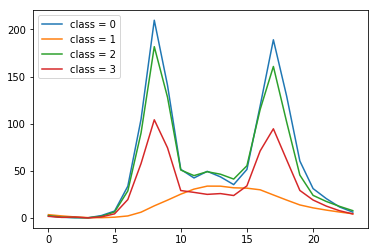

In [67]:
for n, center in enumerate(model.cluster_centers_):
    plt.plot(center, label="class = {}".format(n))
plt.legend()

In [74]:
model.labels_

array([1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 2, 2, 1, 1, 0, 0,
       0, 2, 2, 1, 1, 0, 0, 0, 0, 2, 1, 1, 2, 2, 0, 2, 2, 1, 1, 2, 0, 0, 0,
       2, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 3, 1, 1, 0, 0, 0, 0, 2, 1,
       1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 3, 3, 2, 1, 1, 2, 2, 3, 1, 1, 1, 1, 2,
       3, 3, 2, 2, 1, 1, 0, 0, 2, 1, 3, 1, 1, 3, 3, 3, 2, 3, 1, 1, 3, 3, 1,
       1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 2, 2, 2,
       1, 1, 3, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 2, 3, 1, 1,
       0, 0, 0, 0, 2, 1, 1, 1, 0, 2, 2, 2, 1, 1, 0, 2, 2, 2, 2, 1, 1, 2, 0,
       0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0,
       2, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 2, 0, 0, 2, 1, 1, 0, 0, 0, 0, 2, 1,
       1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0,
       0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0,
       0, 2, 1, 1, 0, 0, 3, 0, 2, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 2,
       1, 1,

In [73]:
labels = pd.DataFrame({'date': X.index, 'cluster': model.labels_})

In [75]:
labels['day'] = labels['date'].apply(lambda x: x.weekday())

In [77]:
labels.head(14)

,cluster,date,day
0,1,2014-09-01,0
1,0,2014-09-02,1
2,0,2014-09-03,2
3,0,2014-09-04,3
4,2,2014-09-05,4
5,1,2014-09-06,5
6,1,2014-09-07,6
7,0,2014-09-08,0
8,0,2014-09-09,1
9,0,2014-09-10,2


In [78]:
from calendar import day_abbr

In [81]:
labels.groupby(['day', 'cluster']).size()

day  cluster
0    0          39
     1           3
     2           7
     3           4
1    0          42
     2           6
     3           4
2    0          39
     1           2
     2           6
     3           5
3    0          32
     1           4
     2          15
     3           1
4    1           4
     2          44
     3           4
5    1          52
6    1          52
dtype: int64

In [85]:
weekday_counts = labels.groupby(['day', 'cluster']).size()

In [86]:
weekday_counts.name = 'count'

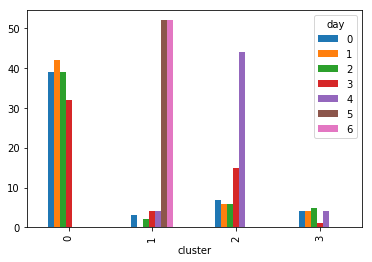

In [90]:
(weekday_counts
 .reset_index()
 .pivot(columns='day', values='count', index='cluster')
 .plot.bar())

In [92]:
labels['month'] = labels['date'].apply(lambda x: x.month)

In [93]:
labels.head()

,cluster,date,day,month
0,1,2014-09-01,0,9
1,0,2014-09-02,1,9
2,0,2014-09-03,2,9
3,0,2014-09-04,3,9
4,2,2014-09-05,4,9


In [95]:
per_month = labels.groupby(['month', 'cluster']).size()

In [97]:
per_month.head()

month  cluster
1      0          12
       1          11
       2           7
       3           1
2      0           9
dtype: int64

In [98]:
per_month.name = 'count'
per_month = per_month.reset_index()

In [99]:
per_month.head()

,month,cluster,count
0,1,0,12
1,1,1,11
2,1,2,7
3,1,3,1
4,2,0,9


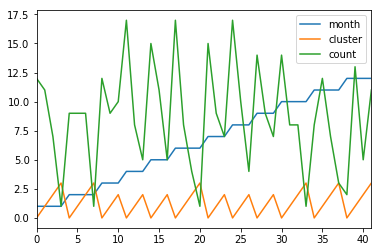

In [100]:
per_month.plot()

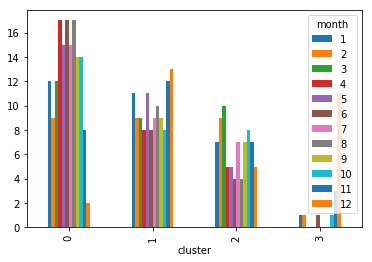

In [102]:
(per_month
 .pivot(columns='month', values='count', index='cluster')
 .plot.bar())

In [103]:
labels[labels.cluster == 3]

,cluster,date,day,month
60,3,2014-10-31,4,10
79,3,2014-11-19,2,11
80,3,2014-11-20,3,11
86,3,2014-11-26,2,11
92,3,2014-12-02,1,12
93,3,2014-12-03,2,12
102,3,2014-12-12,4,12
105,3,2014-12-15,0,12
106,3,2014-12-16,1,12
107,3,2014-12-17,2,12
